In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<Figure size 1080x1080 with 0 Axes>

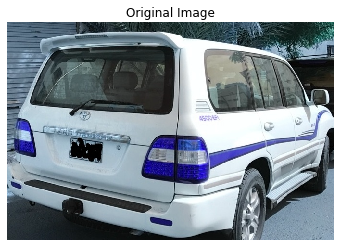

In [2]:
fig = plt.figure(figsize=(15,15))

# read image
image = cv2.imread("./images/ori.jpg")
__, ax = plt.subplots()
ax.set_title('Original Image')
plt.axis('off')
plt.imshow(image)

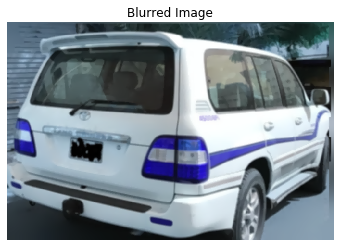

In [3]:
# blur image
img = cv2.pyrMeanShiftFiltering(image, 2, 10, image, 5)
__, ax = plt.subplots()
ax.set_title('Blurred Image')
plt.axis('off')
plt.imshow(img)

In [4]:
def autoCanny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

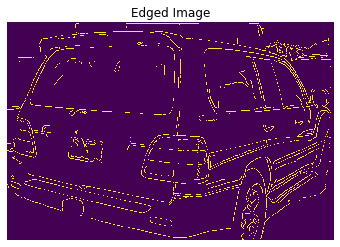

In [5]:
# get edge of image
edges = cv2.Canny(img, 100, 200)
__, ax = plt.subplots()
ax.set_title('Edged Image')
plt.axis('off')
plt.imshow(edges)

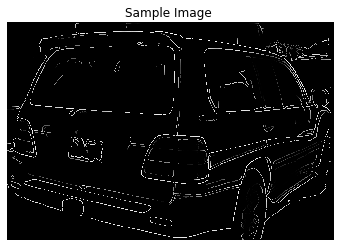

In [6]:
hed = cv2.imread("./images/edges2.jpg")
hed = cv2.cvtColor(hed, cv2.COLOR_BGR2GRAY)

sample = cv2.bitwise_and(hed, edges)
__, ax = plt.subplots()
ax.set_title('Sample Image ')
plt.axis('off')
plt.imshow(sample, cmap="gray")

In [7]:
def getChunk(image, value):        
    # threshold
    __, img_th = cv2.threshold(image, value, 255, cv2.THRESH_BINARY_INV)

    # copy the thresholded image
    img_floodfill = img_th.copy()

    # mask used to flood filling
    # notice the size needs to be 2 pixels than the image
    h, w = img_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # floodfill from point (0, 0)
    cv2.floodFill(img_floodfill, mask, (0,0), 255)

    # invert floodfilled image
    img_floodfill_inv = cv2.bitwise_not(img_floodfill)
    
    return img_floodfill_inv

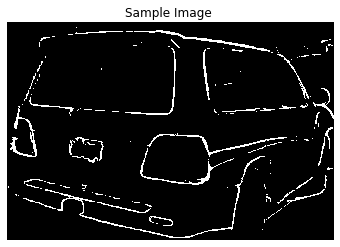

In [54]:
sample2 = getChunk(hed, 210)
__, ax = plt.subplots()
ax.set_title('Sample Image ')
plt.axis('off')
plt.imshow(sample2, cmap="gray")

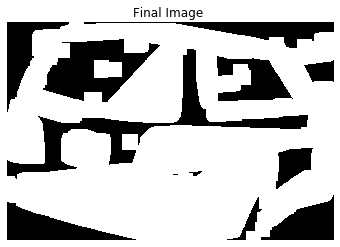

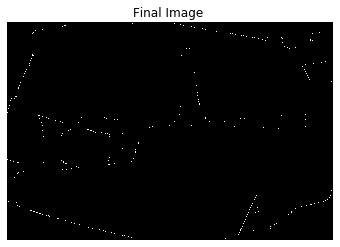

In [56]:
filled2 = getFloodFill(sample2, 7, 7)
__, ax = plt.subplots()
ax.set_title('Final Image ')
plt.axis('off')
plt.imshow(filled2, cmap="gray")

border2 = getBorder(filled2)
__, ax = plt.subplots()
ax.set_title('Final Image ')
plt.axis('off')
plt.imshow(border2, cmap="gray")

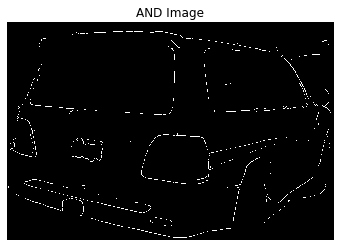

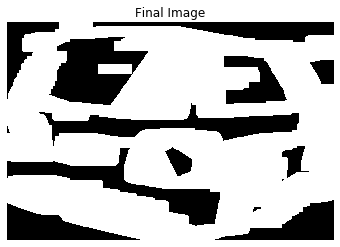

In [69]:
lets = cv2.bitwise_and(sample2, edges)
__, ax = plt.subplots()
ax.set_title('AND Image')
plt.axis('off')
plt.imshow(lets, cmap="gray")

lets2 = getFloodFill(lets, 5, 15)
__, ax = plt.subplots()
ax.set_title('Final Image')
plt.axis('off')
plt.imshow(lets2, cmap="gray")

In [17]:
def getConvexHull(thresh):
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse = True)
    
    # create hull array for convex hull points
    hull = []

    # calculate points for each contour
    for i in range(len(contours)):
        # creating convex hull object for each contour
        hull.append(cv2.convexHull(contours[i], False))

    drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

    # draw contours and hull points
    for i in range(len(contours)):
        color_contours = (255, 255, 255) # white - color for contours
        color = (255, 0, 0) # blue - color for convex hull
        # draw ith contour
        cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
        # draw ith convex hull object
        cv2.drawContours(drawing, hull, i, color, 1, 8)
    
    return drawing

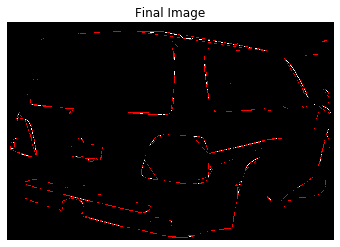

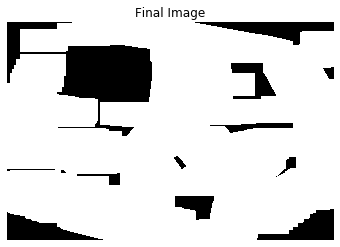

In [30]:
see = getConvexHull(lets)
__, ax = plt.subplots()
ax.set_title('Final Image')
plt.axis('off')
plt.imshow(see, cmap="gray")

see1 = cv2.cvtColor(see, cv2.COLOR_BGR2GRAY)
see2 = getFloodFill(see1, 10, 20)
__, ax = plt.subplots()
ax.set_title('Final Image')
plt.axis('off')
plt.imshow(see2, cmap="gray")

In [10]:
def getFloodFill(image, kernel1, kernel2):
    contours, __ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    hull_list = []

    for c in contours:
        hull = cv2.convexHull(c)
        hull_list.append(hull)

    mask_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    cv2.drawContours(mask_img, hull_list, -1, (255, 255, 255), cv2.FILLED)
    kernel = np.ones((kernel1, kernel2), np.uint8) 
    mask = cv2.dilate(mask_img, kernel, iterations=5)

    return mask

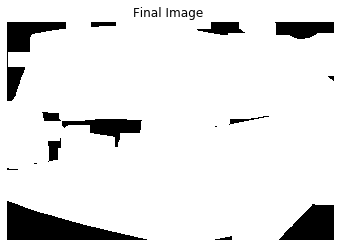

In [37]:
filled = getFloodFill(edges, 5, 10)
__, ax = plt.subplots()
ax.set_title('Final Image ')
plt.axis('off')
plt.imshow(filled, cmap="gray")

In [31]:
def getBorder(image):
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    contours, __ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = image.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    c = max(contours, key=cv2.contourArea)

    border = cv2.drawContours(mask, c, -1, (255, 255, 255), cv2.FILLED)
    
    return border

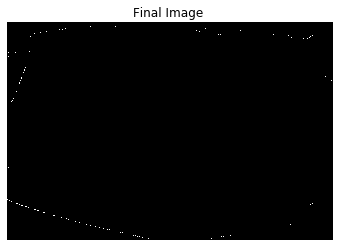

In [38]:
border = getBorder(filled)

__, ax = plt.subplots()
ax.set_title('Final Image ')
plt.axis('off')
plt.imshow(border, cmap="gray")

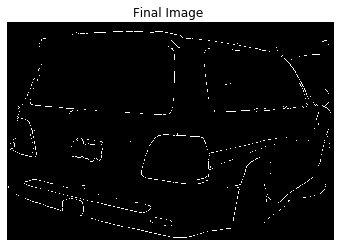

In [70]:
contours, __ = cv2.findContours(lets, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # find bounding box coordinates
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(lets, (x,y), (x+w, y+h), (0, 255, 0), 2)

    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    cv2.drawContours(lets, [box], 0, (0,0, 255), 3)
    # calculate center and radius of minimum enclosing circle
    (x,y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x),int(y))
    radius = int(radius)
    # draw the circle
    lets = cv2.circle(lets, center, radius, (0,255,0), 2)

cv2.drawContours(lets, contours, -1, (255, 0, 0), 1)

__, ax = plt.subplots()
ax.set_title('Final Image ')
plt.axis('off')
plt.imshow(lets, cmap="gray")